<a href="https://colab.research.google.com/github/one-last-time/FTFL/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Feature Selection

Feature selection is also called variable selection or attribute selection.


> feature selection… is the process of selecting a subset of relevant features for use in model construction



> Feature selection is different from dimensionality reduction. Both methods seek to reduce the number of attributes in the dataset, but a dimensionality reduction method do so by creating new combinations of attributes, where as feature selection methods include and exclude attributes present in the data without changing them.


> Feature selection is itself useful, but it mostly acts as a filter, muting out features that aren’t useful in addition to your existing features.




###Why Feature Selection?



> Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.



> Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.



> Fewer attributes is desirable because it reduces the complexity of the model, and a simpler model is simpler to understand and explain.


Objective of Feature Selection:




*   improving the prediction performance of the predictors
*   providing faster and more cost-effective predictors
*   providing a better understanding of the underlying process that generated the data.










http://jmlr.csail.mit.edu/papers/volume3/guyon03a/guyon03a.pdf

### Feature Selection Algorithms

> There are three general classes of feature selection algorithms: filter methods, wrapper methods and embedded methods.





###Filter Methods


> Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.



> Some examples of some filter methods include the Chi squared test, information gain and correlation coefficient scores.





**Advantages of Filter methods**

*   Filter methods are model agnostic
*   Rely entirely on features in the data set
*   Computationally very fast
*   Based on different statistical methods

**The disadvantage of Filter methods**



*   The filter method looks at individual features for identifying it’s relative importance. A feature may not be useful on its own but maybe an important influencer when combined with other features. Filter methods may miss such features.





> **Information gain or mutual information:** assess the dependency of the independent variable in predicting the target variable. In other words, it determines the ability of the independent feature to predict the target variable



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
df = pd.read_csv('auto-mpg.csv')

In [ ]:
import io
dataset= pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Checking the presence of categorical features

In [ ]:
dataset.describe(include='O')

,horsepower,car name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


Updating the horsepower feature to int and filling all nulls with 0

In [ ]:
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce')
.fillna(0).astype(np.int64)
#dataset['horsepower'].describe()

In [ ]:
dataset.describe(include='O')

,car name
count,398
unique,305
top,ford pinto
freq,6


We see that horsepower is no more a categorical variable and Car name is the only categorical variable.

Creating a labelEncoder for Car name to encode Car names with a value between 0 and n_classes-1. In our case n_classes for Car name is 305

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en= dataset.iloc[:, 8].values
X_en = labelencoder.fit_transform(X_en)

Creating the input features X and target variable y

In [ ]:
X= dataset.iloc[:,1:7]
X['Car'] = X_en
y= dataset.iloc[:,0].values

Create a data set with all the input features after converting them to numeric including target variable

In [ ]:
full_data= X.copy()
full_data['mpg']= y
full_data.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,Car,mpg
0,8,307.0,130,3504,12.0,70,49,18.0
1,8,350.0,165,3693,11.5,70,36,15.0


## 1st Step
**Identify input features having high correlation with target variable.**

Here we print the correlation of each of the input feature with the target variable

In [ ]:
importances = full_data.drop('mpg', axis=1).apply(lambda x: x.corr(full_data.mpg))
indices = np.argsort(importances)
print(importances[indices])

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
horsepower     -0.754276
Car             0.273936
acceleration    0.420289
model year      0.579267
dtype: float64


Plotting this data for visualization

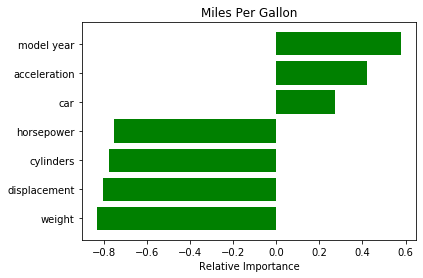

In [ ]:
import matplotlib.pyplot as plt
names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'car']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We want to keep features with only a high correlation with the target variable. This implies that the input feature has a high influence in predicting the target variable.

We set the threshold to the absolute value of 0.4. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4

In [ ]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

cylinders
displacement
horsepower
weight
acceleration
model year


In [ ]:
X= dataset[ ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

We now have reduced the input features from 7 to 6. Car name was dropped as it was not having a high correlation with mpg(miles per gallon)

**Applying step 2 of the filter method**

Identify input features that have a low correlation with other independent variables.

Iterating through all the filtered input features based on step 1 and checking each input feature correlation with all other input features.

We will keep input features that are not highly correlated with other input features


In [ ]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

cylinders  is highly  correlated  with  displacement
cylinders  is highly  correlated  with  horsepower
cylinders  is highly  correlated  with  weight
displacement  is highly  correlated  with  cylinders
displacement  is highly  correlated  with  horsepower
displacement  is highly  correlated  with  weight
horsepower  is highly  correlated  with  cylinders
horsepower  is highly  correlated  with  displacement
horsepower  is highly  correlated  with  weight
weight  is highly  correlated  with  cylinders
weight  is highly  correlated  with  displacement
weight  is highly  correlated  with  horsepower
acceleration  is not correlated  with  model year
model year  is not correlated  with  acceleration


displacement, horsepower, cylinder, and weight are highly correlated. We will keep only keep one of them. Based on the above result we keep cylinders, acceleration and model year and remove horsepower, displacement, and weight

In [ ]:
X= dataset[ ['cylinders', 'acceleration', 'model year']]

**Applying step 3 of the filter method**
Find the information gain or mutual information of the independent variable with respect to a target variable

**Mutual information** is one of many quantities that measures how much one random variables tells us about another. It is a dimensionless quantity with (generally) units of bits, and can be thought of as the reduction in uncertainty about one random variable given knowledge of another.

In [ ]:
mi = mutual_info_regression(X, y)

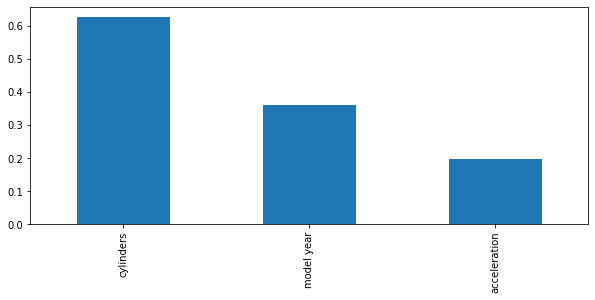

In [ ]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

**Mutual information (MI)**  between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

## Wrapper Method

In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.



*   It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.
*   The evaluation criterion is simply the performance measure which depends on the type of problem, for eg. for regression evaluation criterion can be p-values, R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score
*   Finally, it selects the combination of features that gives the optimal results for the specified machine learning algorithm.
*   It takes high computation power.


*   High chances of over-fitting











![alt text](https://miro.medium.com/max/604/1*zaVVAhJNzgGkH-sx6pwqpQ.gif)

Most commonly used techniques under wrapper methods are:


*   Forward selection
*   Backward elimination
*   Bi-directional elimination(Stepwise Selection)





###Forward selection



*   In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. 
*   Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. 
*   Now fit a model with three features by trying combinations of two previously selected features with other remaining features.
*   Repeat this process until we have a set of selected features with a p-value of individual feature less than the significance level.







###Backward elimination



*   In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with highest p-value(> significance level). 
*   This process repeats again and again until we have the final set of significant features.



### Bi-directional elimination(Stepwise Selection)



*   It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.



In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
print(boston.target)             # for target variable
print(boston.DESCR)              # for data description

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [ ]:
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix 
y = bos['Price']               # target feature
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression


sfs = SFS(LinearRegression(),
           k_features=13,
           forward=True,
           floating=False,
           verbose=2,
           scoring = 'r2',
           cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_
sfs.subsets_






('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')



*   LinearRegression() as an estimator for the entire process. Similarly, it can be any classification based algorithm.
*   k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.
*   forward and floating arguments for different flavors of wrapper methods, here, forward = True and floating = False are for forward selection technique.
*   Scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.
*   cv argument is for k-fold cross-validation.











In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_
#sfs.subsets_
#sfs.k_feature_idx_


('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

**Backward elimination**

## Embedded Feature Selection



*   Feature selection is done by observing each iteration of model training phase 
*   Generally used to reduce over-fitting
*   Lasso, Elastic Net, Ridge Regression







> Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.



> Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).





## Feature Selection For Machine Learning in Python



*   Univariate Selection
*   Recursive Feature Elimination
*   Principal Component Analysis
*   Feature Importance



